In [5]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn 

In [9]:
import seaborn as sns

In [10]:
%matplotlib inline

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.naive_bayes import GaussianNB

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
df=pd.read_csv(r'Data.csv')

In [17]:
df.info

<bound method DataFrame.info of      glucose  bloodpressure  diabetes
0         40             85         0
1         40             92         0
2         45             63         1
3         45             80         0
4         40             73         1
..       ...            ...       ...
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             82         0

[995 rows x 3 columns]>

In [18]:
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [22]:
df.shape

(995, 3)

In [27]:
df.tail(4)

,glucose,bloodpressure,diabetes
991,40,83,0
992,40,83,0
993,40,60,1
994,45,82,0


In [31]:
df[:3]

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1


In [33]:
df[2:7]

,glucose,bloodpressure,diabetes
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0


In [34]:
df['bloodpressure'].head(3)

0    85
1    92
2    63
Name: bloodpressure, dtype: int64

In [36]:
df.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [38]:
#CLUSTERING
df.rename(columns={'glucose':'Glucose','bloodpressure':'Bloodpressure','diabetes':'Diabetes'},inplace=True)

In [42]:
df

,Glucose,Bloodpressure,Diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


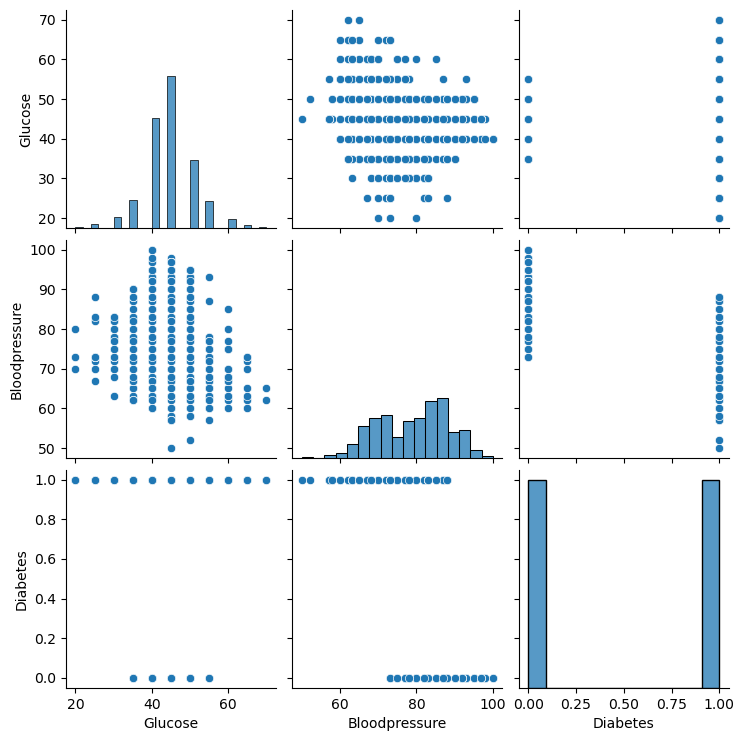

In [44]:
seaborn.pairplot(df[['Glucose','Bloodpressure','Diabetes']])

In [46]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
print(df.columns)

Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')


In [47]:
df[df.bloodpressure=='80']

,glucose,bloodpressure,diabetes


In [48]:
import sklearn.cluster as cluster

In [49]:
kmeans=cluster.KMeans(n_clusters=5) #k=5

In [50]:
Kmeans =kmeans.fit(df[['glucose','bloodpressure','diabetes']])
Kmeans.cluster_centers_

\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[5.45945946e+01, 6.81283784e+01, 1.00000000e+00],
       [4.53690037e+01, 8.09852399e+01, 3.21033210e-01],
       [4.34455128e+01, 8.95673077e+01, 2.56410256e-02],
       [3.15189873e+01, 7.69493671e+01, 9.24050633e-01],
       [4.14324324e+01, 6.88378378e+01, 9.83783784e-01]])

In [51]:
df['clusters']=kmeans.labels_

In [52]:
df['clusters']

0      2
1      2
2      4
3      1
4      4
      ..
990    2
991    1
992    1
993    4
994    1
Name: clusters, Length: 995, dtype: int32

In [53]:
df.head(5)

,glucose,bloodpressure,diabetes,clusters
0,40,85,0,2
1,40,92,0,2
2,45,63,1,4
3,45,80,0,1
4,40,73,1,4


In [54]:
df['clusters'].value_counts()

clusters
2    312
1    271
4    185
0    148
3     79
Name: count, dtype: int64

<Axes: xlabel='bloodpressure', ylabel='glucose'>

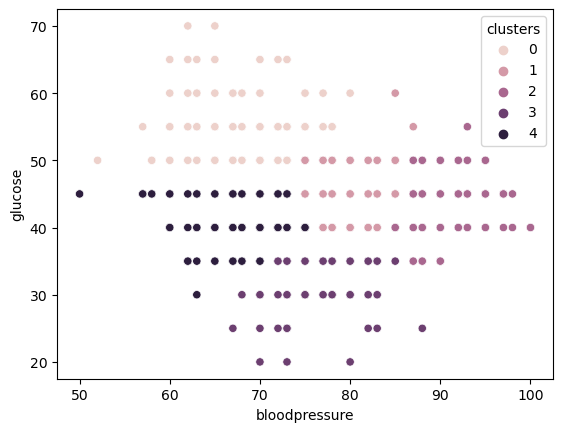

In [55]:
seaborn.scatterplot(x='bloodpressure',y='glucose',hue='clusters',data=df)

In [56]:
from sklearn.cluster import KMeans

In [57]:
K_range=range(1,15)
wcss=[]

In [58]:
for k in K_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['glucose','bloodpressure']])
    wcss.append(km.inertia_)

\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will c

In [59]:
wcss

[131437.48140703523,
 66306.38539796529,
 44193.016767667694,
 35796.86373224921,
 28398.588219692872,
 24653.184597977393,
 21313.862212904794,
 19071.97650902485,
 16844.62202065444,
 15032.501940531229,
 13706.844212053145,
 12967.341753842564,
 11457.194563847486,
 10823.96162470646]

Text(0.5, 1.0, 'Avg')

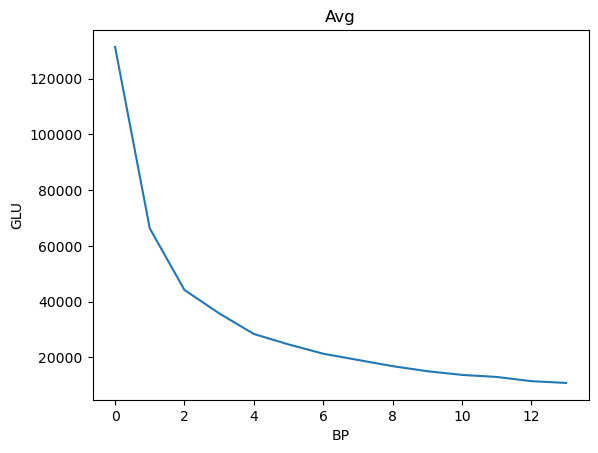

In [60]:
plt.xlabel('BP')
plt.ylabel('GLU')
plt.plot(wcss)
plt.title('Avg')

In [61]:
kmeans=cluster.KMeans(n_clusters=4)

In [62]:
kmeans2 = kmeans.fit(df[['bloodpressure','glucose']])

\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
kmeans.cluster_centers_

array([[88.59585492, 43.57512953],
       [67.21390374, 52.2459893 ],
       [78.82916667, 45.66666667],
       [71.99450549, 35.90659341]])

In [64]:
df['clusters']=kmeans.labels_

In [65]:
df['clusters']

0      0
1      0
2      1
3      2
4      3
      ..
990    0
991    0
992    0
993    3
994    2
Name: clusters, Length: 995, dtype: int32

In [66]:
X = df[['glucose', 'bloodpressure']] #features
y = df['diabetes'] #target

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
#Split into training and test sets

In [68]:
# Train the model
model = GaussianNB()  # when data has real values 
model.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred = model.predict(X_test)

In [73]:
print(accuracy_score(y_test, y_pred))


0.9170854271356784


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [77]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [79]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [109]:
print(svm_model.score(X_train, y_train))


0.953083109919571


In [81]:
print( svm_model.score(X_test, y_test))

0.9156626506024096


In [115]:
# Logistic Regression
h=df['glucose'].median()

In [117]:
h

45.0

In [119]:
df.glucose=df.glucose.fillna(h)

In [121]:
df

,glucose,bloodpressure,diabetes,clusters
0,40,85,0,0
1,40,92,0,0
2,45,63,1,1
3,45,80,0,2
4,40,73,1,3
...,...,...,...,...
990,45,87,0,0
991,40,83,0,0
992,40,83,0,0
993,40,60,1,3


In [123]:
df['glucose'].value_counts()

glucose
45    365
40    264
50    162
35     68
55     64
30     27
60     22
25     10
65      8
20      3
70      2
Name: count, dtype: int64

In [125]:
x=df[['bloodpressure']]

In [127]:
x

,bloodpressure
0,85
1,92
2,63
3,80
4,73
...,...
990,87
991,83
992,83
993,60


In [129]:
y=df[['bloodpressure']]

In [131]:
y

,bloodpressure
0,85
1,92
2,63
3,80
4,73
...,...
990,87
991,83
992,83
993,60


In [133]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_tet=train_test_split(x,y,test_size=0.2,random_state=42)

In [139]:
x_train

,bloodpressure
909,90
925,78
974,78
765,73
911,72
...,...
106,75
270,67
860,78
435,93


In [141]:
x_test

,bloodpressure
920,70
525,75
567,65
657,93
633,88
...,...
486,83
451,72
65,87
141,80


In [143]:
from sklearn.linear_model import LogisticRegression

In [145]:
model=LogisticRegression()

In [147]:
model.fit(x_train,y_train)

\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
model.predict(x_test)

array([73, 73, 68, 90, 88, 87, 73, 87, 88, 73, 90, 83, 90, 83, 90, 73, 78,
       68, 73, 90, 83, 73, 73, 88, 88, 90, 73, 68, 88, 83, 90, 73, 88, 73,
       83, 73, 73, 88, 87, 87, 68, 88, 88, 90, 88, 90, 78, 73, 73, 68, 88,
       78, 83, 73, 83, 68, 73, 68, 73, 83, 88, 73, 73, 83, 90, 68, 83, 83,
       78, 73, 88, 88, 83, 88, 73, 83, 83, 88, 73, 73, 88, 83, 83, 88, 83,
       88, 90, 78, 87, 73, 88, 83, 68, 83, 73, 73, 83, 73, 73, 68, 73, 73,
       73, 90, 88, 78, 73, 87, 73, 88, 68, 88, 83, 88, 83, 78, 83, 88, 68,
       78, 68, 87, 88, 88, 88, 73, 73, 90, 73, 73, 73, 87, 88, 87, 78, 68,
       73, 73, 83, 73, 73, 83, 78, 73, 68, 68, 87, 83, 73, 68, 83, 73, 83,
       87, 73, 73, 78, 88, 88, 73, 73, 73, 88, 73, 73, 73, 88, 87, 73, 73,
       78, 88, 73, 83, 83, 73, 88, 73, 73, 73, 78, 78, 88, 88, 88, 78, 73,
       73, 87, 73, 73, 68, 78, 87, 83, 73, 88, 83, 90], dtype=int64)

In [188]:
x_test = x_test[:199]  # Keep only the first 199 samples of x_test

In [190]:
y_test = y_test[:249]  # Keep only the first 249 samples of y_test

In [192]:
print(x_test.isnull().sum())
print(y_test.isnull().sum())

bloodpressure    0
dtype: int64
bloodpressure    0
dtype: int64


In [194]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [196]:
model.score(x_test,y_test)

0.24623115577889448

In [199]:
model.score(x_train,y_train)

0.25125628140703515

In [201]:
x=df.iloc[:,0:1].values

In [203]:
y=df.iloc[:,1].values

In [205]:
from sklearn.model_selection import train_test_split

In [207]:
from sklearn.linear_model import LinearRegression

In [209]:
LinReg=LinearRegression()

In [211]:
model=LinReg.fit(x_train,y_train)

In [215]:
model.predict([[10]])

\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10.]])

In [217]:
model.score(x_train,y_train)

1.0

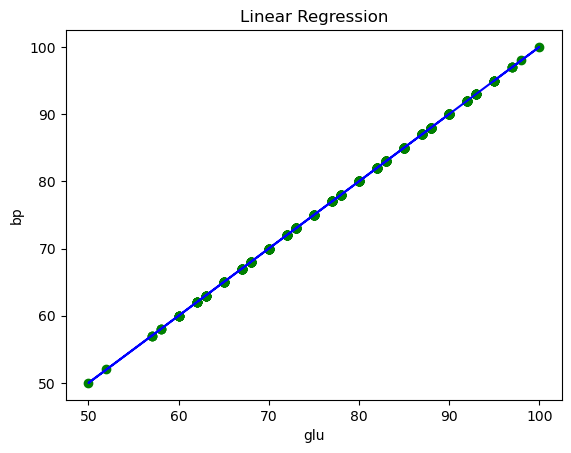

In [221]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,LinReg.predict(x_train),color='blue')
plt.title('Linear Regression')
plt.xlabel('glu')
plt.ylabel('bp')
plt.show()

In [223]:
from sklearn.preprocessing import PolynomialFeatures

In [229]:
polynom=PolynomialFeatures(degree=2)

In [231]:
x_polynom=polynom.fit_transform(x_train)

In [235]:
x_polynom

array([[1.000e+00, 9.000e+01, 8.100e+03],
       [1.000e+00, 7.800e+01, 6.084e+03],
       [1.000e+00, 7.800e+01, 6.084e+03],
       ...,
       [1.000e+00, 7.800e+01, 6.084e+03],
       [1.000e+00, 9.300e+01, 8.649e+03],
       [1.000e+00, 9.500e+01, 9.025e+03]])

In [237]:
polyReg=LinearRegression()

In [239]:
modell=polyReg.fit(x_polynom,y_train)

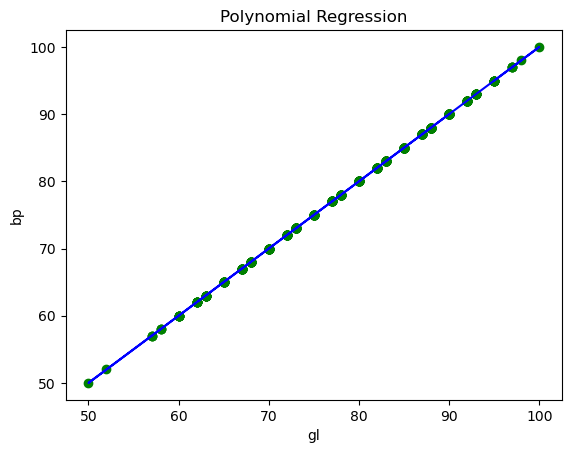

In [249]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,polyReg.predict(polynom.fit_transform(x_train)),color='blue')
plt.title('Polynomial Regression')
plt.xlabel('gl')
plt.ylabel('bp')
plt.show()

In [251]:
y_predict_slr = LinReg.predict(x_test)
#Model Evaluation using R-Square for Simple Linear Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test,y_predict_slr)
print('R-Square Error associated with Simple Linear Regression:', r_square)

R-Square Error associated with Simple Linear Regression: 1.0


In [255]:
y_predict_pr = polyReg.predict(polynom.fit_transform(x_test))

#Model Evaluation using R-Square for Polynomial Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test,y_predict_pr)
print('R-Square Error associated with Polynomial Regression is:', r_square)

R-Square Error associated with Polynomial Regression is: 1.0


In [257]:
LinReg.predict([[54]])

\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[54.]])

In [261]:
polyReg.predict(polynom.fit_transform([[54]]))

array([[54.]])